In [17]:
import librosa
import os
import pandas as pd
import librosa
import librosa.display
import numpy as np
import glob 
import matplotlib.pyplot as plt
import keras
from keras.models import model_from_json
import warnings 
warnings.filterwarnings('ignore')

In [18]:
def voice_prediction(file):
    data, sampling_rate = librosa.load(file)
    plt.figure(figsize=(15, 5))
    librosa.display.waveplot(data, sr=sampling_rate)
    X, sample_rate = librosa.load(file, res_type='kaiser_fast',duration=3,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
    featurelive = mfccs
    livedf2 = featurelive
    livedf2= pd.DataFrame(data=livedf2)
    livedf2 = livedf2.stack().to_frame().T
    twodim= np.expand_dims(livedf2, axis=2)
    # loading json and creating model
    opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
    
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model/Emotion_Voice_Detection_Model.h5")
    print("Loaded model from disk")
    livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)
    livepreds1=livepreds.argmax(axis=1)
    liveabc = livepreds1.astype(int).flatten()
    pred_to_class = {
	0: "female_angry",
	1: "female_calm",
	2: "female_fearful",
	3: "female_happy",
	4: "female_sad",
	5: "male_angry",
	6: "male_calm",
	7: "male_fearful",
	8: "male_happy",
	9: "male_sad"
}
    print(pred_to_class[liveabc.item()])
    

Loaded model from disk
1/1 [==============================] - 0s 455ms/step
female_calm


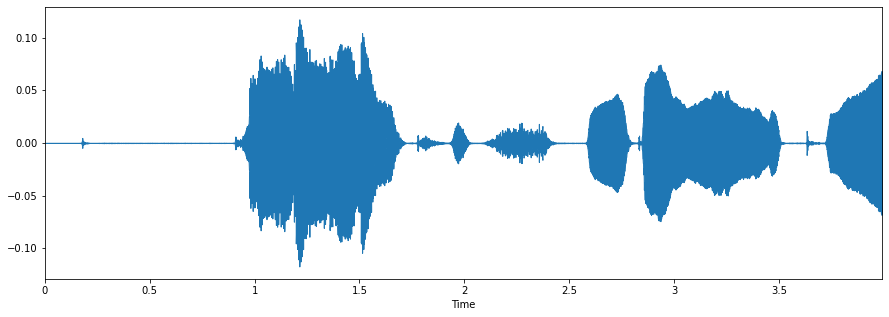

In [19]:
voice_prediction("final5.wav")

Loaded model from disk
1/1 [==============================] - 0s 444ms/step
female_angry


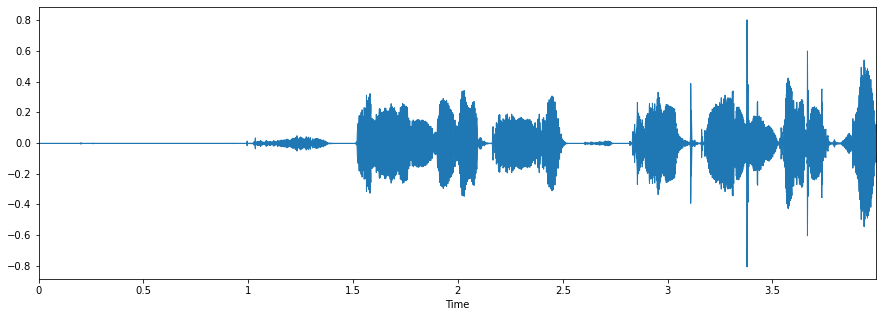

In [20]:
voice_prediction("final.wav")